In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%precision 4

cos = np.cos
sin = np.sin
twopi = np.pi*2.
pi = np.pi

def myrotate(th):
    # Add pi/2 to make it reference the x-axis
    # on range [0,pi]
    th = (th+pi/2.) if th<(3.*pi/2.) else (th-3.*pi/2.)
    if th > pi: th -= pi
    return th


In [2]:
def plotLine(x1,y1,x2,y2,c='b',ax=None,lw=0.4):
    if ax: # given axis handle
        ax.plot([x1, x2], [y1, y2], color=c, linestyle='-', linewidth=lw);
    else:
        plt.gca().plot([x1, x2], [y1, y2], color=c, linestyle='-', linewidth=lw);

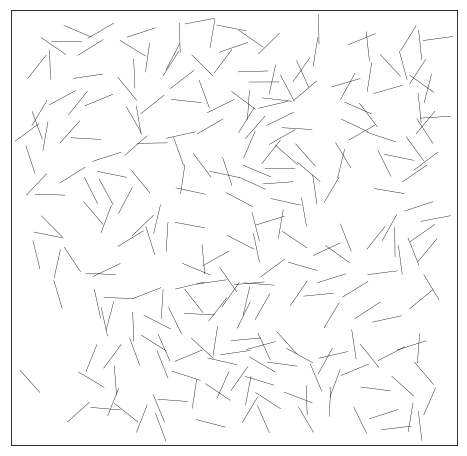

In [133]:
f,ax = plt.subplots(1,1,figsize=(8,8))
_=ax.set_xticks([])
_=ax.set_yticks([]);
plt.margins(0.01,0.01)

plotrods(rods,ax)

In [84]:
def plotrods(rods,myax,halfL=0.5,hotrods=[],col='k',lw=0.4):
#     f,myax=plt.subplots(1,1,figsize=(8,8),frameon=False)
#     myax.set_xticks([])
#     myax.set_yticks([]);
#     plt.margins(0.01,0.01)
    for r in rods:
        th = r[2]
        x1 = r[0] - halfL*cos(th)
        x2 = r[0] + halfL*cos(th)
        y1 = r[1] - halfL*sin(th)
        y2 = r[1] + halfL*sin(th)
        plotLine(x1,y1,x2,y2,c=col,lw=lw,ax=myax)
        
    if len(hotrods)>0:
        for r in hotrods:
            th = r[2]
            x1 = r[0] - halfL*cos(th)
            x2 = r[0] + halfL*cos(th)
            y1 = r[1] - halfL*sin(th)
            y2 = r[1] + halfL*sin(th)
            plotLine(x1,y1,x2,y2,c='r',lw=1.6,ax=myax)

In [19]:
# Create two test files
f1 = '/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.00'
f2 = '/home/walterms/mcmd/output/paperruns/edge_3/edge_3_14.00'
# f2 = '/home/walterms/mcmd/output/edge_iso'

f1out_ = "/home/walterms/mcmd/nn/test1"
f2out_ = "/home/walterms/mcmd/nn/test2"

Nrod = 28**2

fin1 = open(f1,'r')
f1out = open(f1out_,'w')
nbl = 0

header = fin1.readline()
f1out.write(header)
print header

rods = []
testrods1 = np.zeros((Nrod,3))
for l in fin1.readlines():
    if nbl < 2:
        if l=="\n": nbl+=1
        continue
    if l=="\n":
        # Done
#         trods = rods[100:100+Nrod]
        trods = rods
        for ti,r in enumerate(trods):
            f1out.write("%d %d %6g %6g %6g\n"%(int(r[0]),int(r[1]),r[2],r[3],r[4]))
            r[4] = myrotate(r[4])
            testrods1[ti] = r[2:5]
        break
    rod = [float(x) for x in l.split()]
    rods.append(rod)
    
fin1.close()
f1out.close()

fin2 = open(f2,'r')
f2out = open(f2out_,'w')
nbl = 0

header = fin2.readline()
f2out.write(header)

rods = []
testrods2 = np.zeros((Nrod,3))
for l in fin2.readlines():
    if nbl < 2:
        if l=="\n": nbl+=1
        continue
    if l=="\n":
        # Done
#         trods = rods[100:100+Nrod*3:3]
        trods = rods
        for ti,r in enumerate(trods):
            f2out.write("%d %d %6g %6g %6g\n"%(int(r[0]),int(r[1]),r[2],r[3],r[4]))
            r[4] = myrotate(r[4])
            testrods2[ti] = r[2:5]
        break
    rod = [float(x) for x in l.split()]
    rods.append(rod)
    
fin2.close()
f2out.close()


Nx 28|Ny 28|nObj 784|dr 0.25|cellNx 6|cellNy 6|nCell 36|boxEdge 7|box.x 7|box.y 7|cellWidth 1.16667|AR 1|shape iso|molWidth 1|length 1|transFactor 0.04|transMag 0.01|angMag 0.04|crossEval 1000|printUncross 0|nEquil 1000000|nProc 1251000|sweepEval 4500|Rho 16|ReducedRho 16



In [ ]:
# f,ax = plt.subplots(1,1)
for nn in range(10,11):
    lam1,nbrs1,_,nems1 = Lambda(testrods1,n_nbr=nn)
    lam2,nbrs2,_,nems2 = Lambda(testrods2,n_nbr=nn)

    print nn, np.var(lam1), np.var(lam2)
    

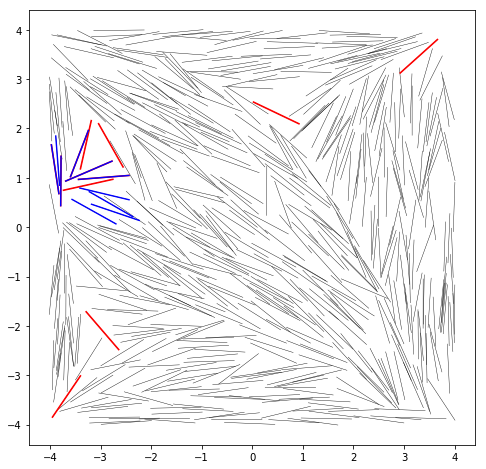

In [32]:
f,ax = plt.subplots(1,1,figsize=(8,8))
ids = np.argwhere(np.abs(lam2)<0.5)
plotrods(testrods2,hotrods=testrods2[ids].reshape(-1,3),ax=ax)
plotrods(nbrs2[ids[1]].reshape(-1,3),col="b",lw=1.4,ax=ax)

In [27]:
source = "/home/walterms/mcmd/output/paperruns/edge_3/"
fnames = sorted([source+f for f in os.listdir(source)])
newnames = []
for f in fnames:
    if f.endswith(".log") or f.endswith("swp"): continue
    if f.startswith(source+"edge_3"): 
        newnames.append(f)
fnames = newnames

# Sort based on edge size
edges = []
for f in fnames:
    fin = open(f,'r')
    header = fin.readline().split("|")
    params = {}
    for l in header:
        spt = l.split()
        try:
            params.update({spt[0]: float(spt[1])})
        except:
            continue
            
    edges.append([params["boxEdge"],params["ReducedRho"]])
    
idxs = np.argsort(edges,axis=0)
edges = np.array([edges[i] for i in idxs[:,0]])
fnames = [fnames[i] for i in idxs[:,0]]
fnames, edges = fnames[::2], edges[::2]
nfiles = len(fnames)

In [4]:
def dist_from(ref,rs):
    # ref is 1x2 ndarray
    # rs is list of vectors to compare, nx2
    return np.linalg.norm((ref-rs),axis=1)

def nematicdirector(Q):
    # Given Q matrix return order parameter and angle
    w,v = np.linalg.eig(Q)
    idx = np.argmax(w)
    Lam = w[idx] # Equiv to sqrt(S*S+T*T)
    nu = v[:,idx]
    alpha = np.angle(np.complex(nu[0,0],nu[1,0]))
    if alpha < 0: alpha = twopi+alpha
    return Lam, alpha

def Lambda(block,n_nbr,r_nbr_max=np.inf,edge=0.,use_bulk=False,rodskip=1):
    # This only considers centers
    # Might be more effective with more precise comparisons
    # rc is a cutoff distance
    # ret_nbrs boolean as to if returning nbrs
    # rodskip is a way to make things more efficient
    # it is the skip step for taking lambda evaluations
    if use_bulk:
        block = block[np.where(block[:,0] > -0.25*edge)]
        block = block[np.where(block[:,0] < 0.25*edge)]
        block = block[np.where(block[:,1] > -0.25*edge)]
        block = block[np.where(block[:,1] < 0.25*edge)]

        
    block2 = block.copy()
    nrod = len(block)
    if n_nbr > nrod-1:
        n_nbr = nrod-1
    maxnbr = n_nbr
    nlambda = nrod//rodskip # number of lambdas eval

    lambdas = []
#     nbrs = np.zeros((len(block),maxnbr,3))
    z = np.zeros((nrod,1))
    block2 = np.append(block2,z,axis=1)
    
    n_nbr_count = []
    nem_dirs = []
    
#     # Calc S, T and global nem director
#     S = np.mean(cos(2*block[:,2]))
#     T = np.mean(sin(2*block[:,2]))
#     Q = np.matrix([[S,T],[T,-S]])
#     LAM, alpha = nematicdirector(Q)
#     print LAM
#     alpha = 0.
#     print LAM, S, T, alpha

    # From yao--This actually produces different results
#     cos_0 = 0.5*(1 + S / LAM)
#     alpha2 = np.arccos(cos_0)
        
    
    for i,rod in enumerate(block[::rodskip]):
        cent = np.asarray([rod[0],rod[1]])
        dists = dist_from(cent,block2[:,:2])
        block2[:,-1] = dists
        block2 = block2[block2[:,-1].argsort()]
        
        # How many are within r_nbr
#         n_nbr = len(np.where(block2[:,-1]<r_nbr_max)[0]) - 1 # -1 the ref rod
#         n_nbr = min(maxnbr,n_nbr)
        
        # Grab n neighbours with r_nbr
#         nbrs[i,:n_nbr] = block2[1:n_nbr+1,:3]
        
        lam = None
        
        if (0):
            # Simply x-axis ref
            lam = cos(2*(rod[2]))
        
        if (0):
            # Neo method X
            th_ij = rod[2] - alpha
            lam = cos(2*th_ij)
            
        if (0):
            # Method 1
            # Calculate cos_ij, then take mean of trigs
            th_ij = rod[2] - block2[1:n_nbr+1,2] # (we exclude 0th entry for identical rod)
            c, s = np.mean(cos(2.*th_ij)), np.mean(sin(2.*th_ij))
#             lam = np.sqrt(c*c + s*s)
            lam = c
            
        if (0):
            # Method 2
            # Locate nematic direction theta as mean of trig arguments
            # Then calc trig of i wrt to the nematic angle
            th_j = block2[1:n_nbr+1,2]
            S,T = np.mean(cos(2.*th_j)), np.mean(sin(2.*th_j))
            Lam = np.sqrt(S*S+T*T)
            Q = np.matrix([[S,T],[T,-S]])
            Lam, alpha = nematicdirector(Q)
            lam = cos(2*(rod[2] - alpha))
#             lam = Lam
            
#             cos_0 = 0.5*(1 + S / Lam) # From Yao
#             th_i0 = np.arccos(cos_0) - rod[2]
#             lam = 3./2 * np.square(cos(th_i0)) - 1/2.

        if (1):
            # Method 3 -- From Robinson paper (also Frenkel AND Galanis)
            th_j = block2[:n_nbr,2]
            Q_11 = np.mean(2.*np.square(cos(th_j)) - 1.)
            Q_12 = np.mean(2.*cos(th_j)*sin(th_j))
            Q_22 = np.mean(2.*np.square(sin(th_j)) - 1.)
#             w,v = np.linalg.eig(np.matrix([[Q_11,Q_12],[Q_12,Q_22]]))
            lam = np.sqrt(Q_11*Q_11 + Q_12*Q_12) # This is correct expression for eigenvalue
            
#             # Want the positive eigenvalue
#             wi = np.argmax(w)
#             s, n = w[wi], v[wi].reshape(2)
#             n.reshape(2)
            
#             # Now, return 2nd Legendre poly wrt n
#             th_n = np.arccos(n[0,0])
#             nem_dirs.append(th_n)
#             lam = cos(2*(rod[2] - th_n))
            
# #             print rod[2], th_n, lam, s

        if (0):
            # Method 4 -- From Adrienko (Intro to LC)
            th_j = block2[:n_nbr,2]
            Q_11 = np.mean(np.square(cos(th_j)) - 1./3.)
            Q_12 = np.mean(cos(th_j)*sin(th_j))
            Q_22 = np.mean(np.square(sin(th_j)) - 1./3.)
            w,v = np.linalg.eig(np.matrix([[Q_11,Q_12],[Q_12,Q_22]]))
            lam = max(w)
        
        
        lambdas.append(lam)
        n_nbr_count.append(n_nbr)
    
    return np.array(lambdas)

In [5]:
def Lambda2(block, m, edge, nmin=5, ignore_walls=False):
    # Takes block of rods, and m for m by m cells, and edge
    # coords go from [-edge/2, edge/2] for either x or y
    # nmin is the minimum number of rods for a cell
    nrod = len(block)
    delm = 1./m
    lambdas = np.zeros(shape=(m,m),dtype=float)
    block2 = block.copy()
    block2[:,0] = block2[:,0] / edge + 0.5
    block2[:,1] = block2[:,1] / edge + 0.5
    xcells = np.floor(block2[:,0] / delm)
    ycells = np.floor(block2[:,1] / delm)
    block2 = np.append(block2,xcells.reshape(nrod,1),axis=1)
    block2 = np.append(block2,ycells.reshape(nrod,1),axis=1)

    for xc in range(m):
        if ignore_walls:
            if xc == 0 or xc == m-1: continue
        for yc in range(m):
            if ignore_walls:
                if yc == 0 or yc == m-1: continue
            thetas = []
            for rod in block2:
                if (rod[3] == float(xc)) and (rod[4] == float(yc)):
                    thetas.append(rod[2])
                    
            if len(thetas) < nmin: continue
            S = np.mean(cos(2.* np.array(thetas)))
            T = np.mean(sin(2.* np.array(thetas)))
            lambdas[xc,yc] = np.sqrt(S*S+T*T)

    return lambdas.flatten()

In [2]:
def Lambda_bulk_global(block, edge):
    block = block[np.where(block[:,0] > -0.25*edge)]
    block = block[np.where(block[:,0] < 0.25*edge)]
    block = block[np.where(block[:,1] > -0.25*edge)]
    block = block[np.where(block[:,1] < 0.25*edge)]

    block2 = block.copy()
    nrod = len(block)
#     z = np.zeros((nrod,1))
#     block2 = np.append(block2,z,axis=1)

    # Calc S, T and global nem director
    S = np.mean(cos(2*block[:,2]))
    T = np.mean(sin(2*block[:,2]))
    Q = np.matrix([[S,T],[T,-S]])
    Lam, alpha = nematicdirector(Q)
    
    return Lam

In [3]:
def getfnames(source,run,nrod):
    # Also returns edges cuz ynot
    fnames = sorted([source+f for f in os.listdir(source)])
    newnames = []
    for f in fnames:
        if f.endswith(".log") or f.endswith("swp"): continue
        if f.startswith(source+run): 
            newnames.append(f)
    fnames = newnames

    # Sort based on edge size
    edges = []
    for f in fnames:
        
        edg = float(f[len(source)+len(run)+1:])
        rh = nrod / (edg**2)
        edges.append([edg,rh])

    idxs = np.argsort(edges,axis=0)
    edges = np.array([edges[i] for i in idxs[:,0]])
    fnames = [fnames[i] for i in idxs[:,0]]
    fnames, edges = fnames[::1], edges[::1]
    
    return fnames, edges

In [4]:
getfnames("/home/walterms/mcmd/nn/data/unlbl/edge_1/","edge",20**2)

ZeroDivisionError: float division by zero

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.00 16.0


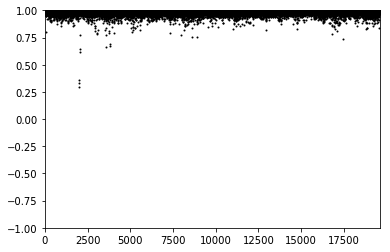

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.11 15.50875235647975


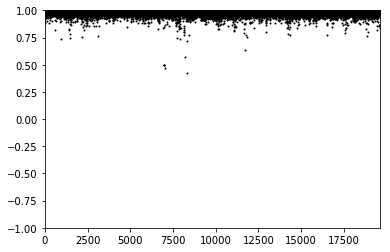

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.22 15.039786373646612


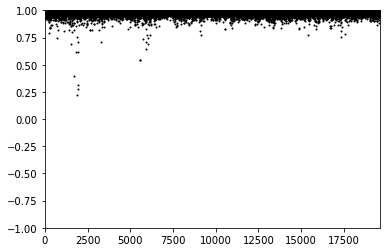

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.35 14.5124716553288


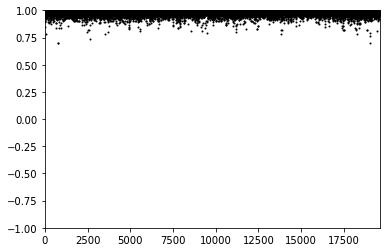

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.47 14.049952599330835


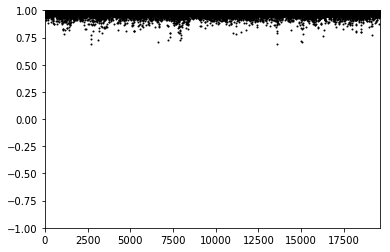

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.61 13.537758085097932


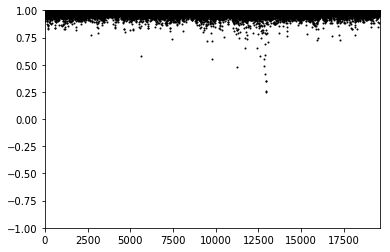

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.75 13.053069719042664


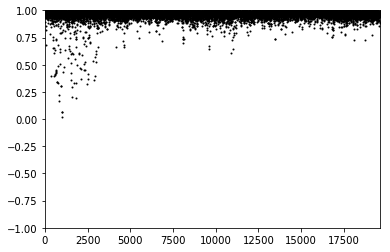

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.90 12.562089408748598


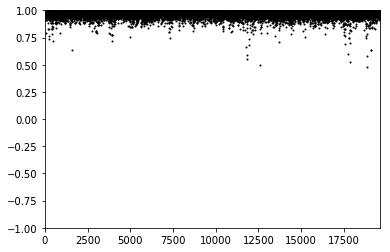

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.05 12.09829867674858


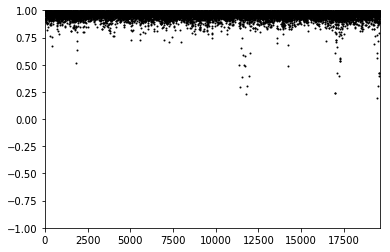

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.22 11.603057050337139


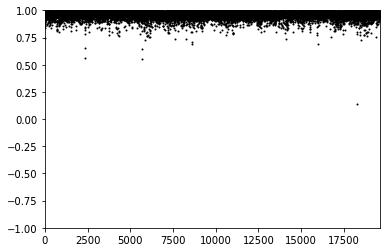

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.40 11.11111111111111


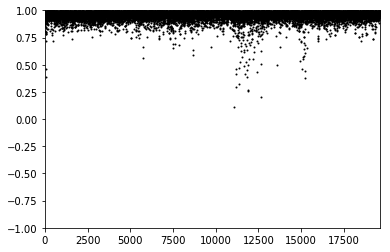

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.60 10.600324499729584


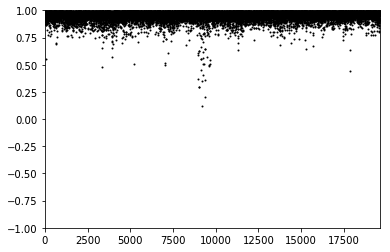

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.80 10.123966942148758


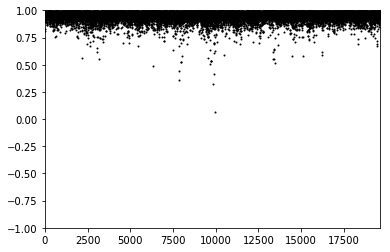

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.02 9.636137482116608


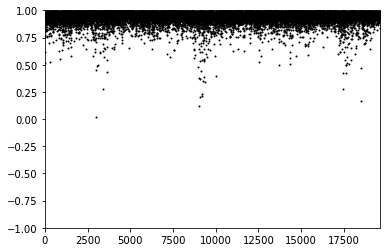

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.26 9.143113043397134


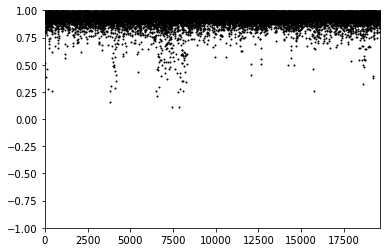

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.52 8.650519031141869


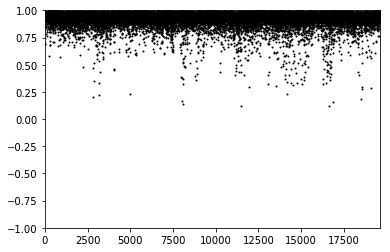

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.80 8.163265306122447


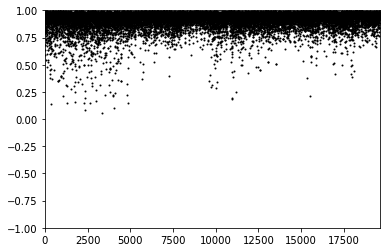

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.11 7.670324746287378


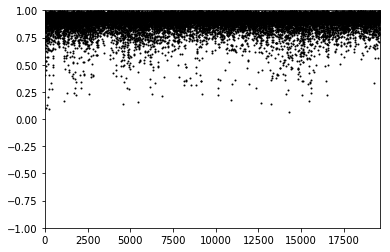

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.45 7.179322817701061


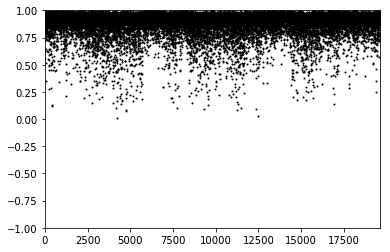

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.82 6.696710753345792


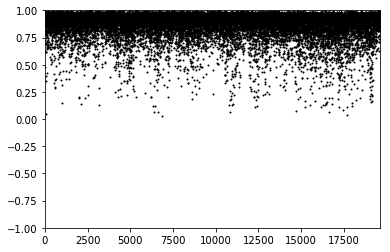

/home/walterms/mcmd/nn/data/unlbl/edge_3_11.24 6.205595167234457


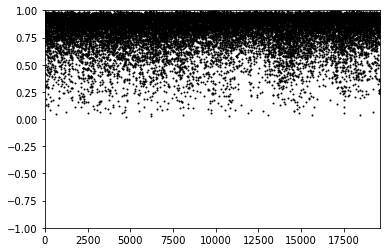

/home/walterms/mcmd/nn/data/unlbl/edge_3_11.71 5.71744864688264


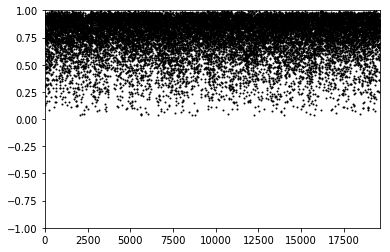

/home/walterms/mcmd/nn/data/unlbl/edge_3_12.25 5.224489795918367


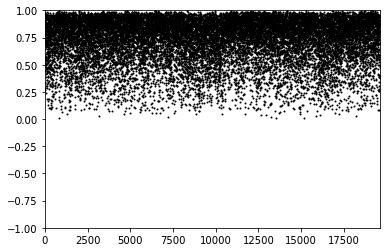

/home/walterms/mcmd/nn/data/unlbl/edge_3_12.87 4.7332448264849205


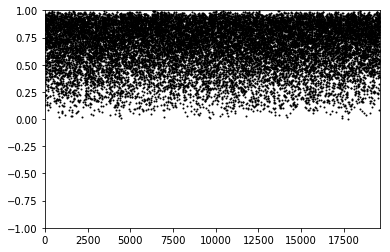

/home/walterms/mcmd/nn/data/unlbl/edge_3_13.59 4.244994669391261


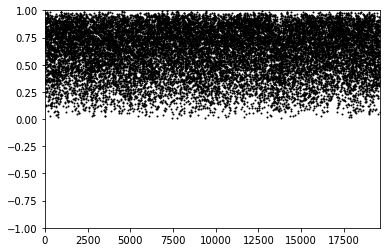

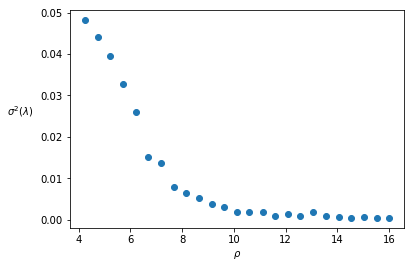

Done


In [133]:
# This block is different
# It's for handling the FNN unlabeled dataset
source = "/home/walterms/mcmd/nn/data/unlbl/"
fnames, edges = getfnames(source,run="edge_3")
nfiles = len(fnames)

NBL = 4500
rodskip = 1 # for efficiency. 1 means do all
nrod = 28**2
n_nbr = 10
m = 5
nmin = 5
nblskip = 2
nlambda = NBL

lambdas_bulk = np.empty((nfiles,nlambda))
lambdas_glob = np.empty((nfiles,nlambda))
for ifile,f in enumerate(fnames):
    fin = open(f,'r')
    params = {}
    params.update({"ReducedRho": edges[ifile,1]})
    params.update({"boxEdge": edges[ifile,0]})
    print f,params["ReducedRho"]
    edge = params["boxEdge"]
    nbl = 0
    lambdacount = 0
    rods = np.zeros((nrod,3))
    cells = np.zeros((nrod,1))
    irod = 0
    
    for line in fin.readlines():
        if nbl < nblskip:
            if line == "\n": nbl+=1
            continue
        if line == "\n":
            # Done a block
#             L = Lambda(rods,n_nbr=n_nbr,edge=edge,use_bulk=True,rodskip=5)
#             L = Lambda2(rods,m,edge,nmin,ignore_walls=ignore_walls)
#             L = L[np.where(L>0.)] # remove zeroed entries that had no rods
#             if len(L) + lambdacount >= nlambda:
#                 L = L[:nlambda-lambdacount]
#             lambdas[ifile,lambdacount:(lambdacount+len(L))] = L
#             lambdacount += len(L)

            lambdas_bulk[ifile,lambdacount] = Lambda_bulk_global(rods,edge)
            lambdas_glob[ifile,lambdacount] = Lambda_bulk_global(rods,2.*edge)
            lambdacount += 1

            if lambdacount >= nlambda:
                break
            nbl+=1
            rods = np.zeros((nrod,3))
            cells = np.zeros((nrod,1))
            irod = 0
            continue

        rod = [float(s) for s in line.split()]
        rod[0] *= edge
        rod[1] *= edge
        rod[2] *= twopi
        rods[irod] = rod
        irod+=1
    fin.close()
#   print np.mean(lambdas[ifile])
#     _=plt.plot(lambdas[ifile],'k.',markersize=2)
#     _=plt.axis([0,nlambda,-1,1])
#     plt.show()

var_bulk = np.var(lambdas_bulk,axis=1)
var_glob = np.var(lambdas_glob,axis=1)
# _ = plt.plot(edges[:,1],lvar,'o')
# _ = plt.xlabel(r'$\rho$')
# _ = plt.ylabel(r'$\sigma^2(\lambda)$',rotation="horizontal",labelpad=20)
# plt.show()
f,ax = plt.subplots(1,1)
ln1 = ax.plot(edges[:,1],var_bulk,"ko",label="bulk")
ax.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)
twin = ax.twinx()
ln2 = twin.plot(edges[:,1],var_glob,"k+",label="global")
twin.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)

# added these three lines
axs = ln1+ln2
labs = [l.get_label() for l in axs]
ax.legend(axs, labs, loc="upper right")

# Save lvars
spath = "/home/walterms/mcmd/nn/data/"
fout = open(spath+"bulk-global-compare-edge3.dat",'w')
for i in range(len(var_bulk)):
    # line format: edge, rho, varbulk, varglob
    fout.write("%g %g %g %g\n"%(edges[i,0],edges[i,1],var_bulk[i],var_global[i]))
fout.close()


print "Done"

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.00 16.0


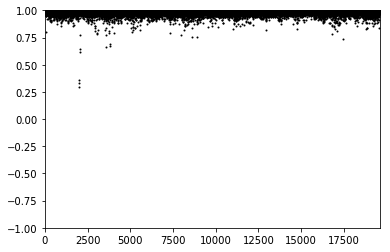

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.11 15.50875235647975


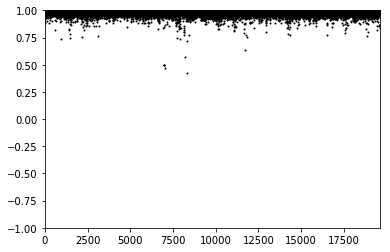

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.22 15.039786373646612


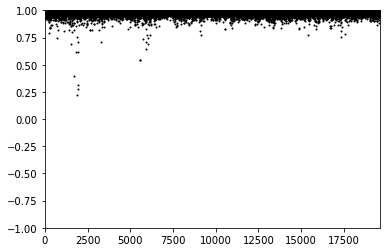

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.35 14.5124716553288


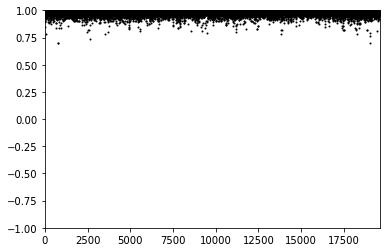

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.47 14.049952599330835


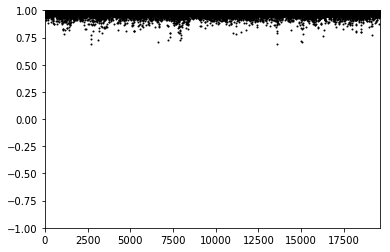

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.61 13.537758085097932


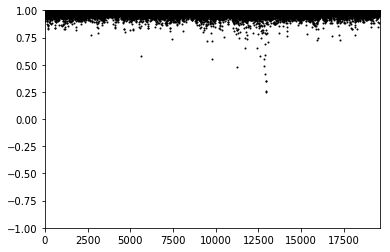

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.75 13.053069719042664


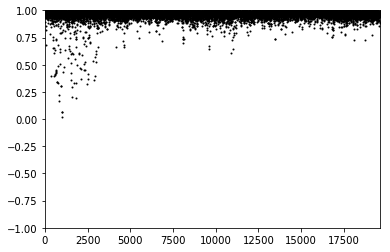

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.90 12.562089408748598


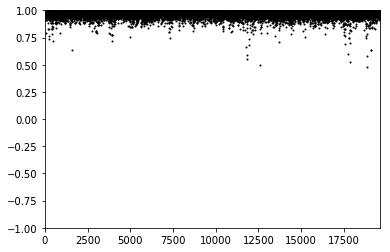

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.05 12.09829867674858


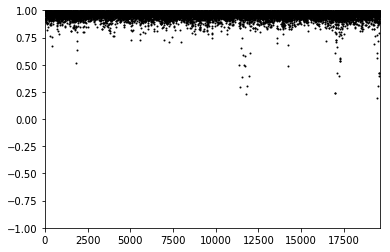

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.22 11.603057050337139


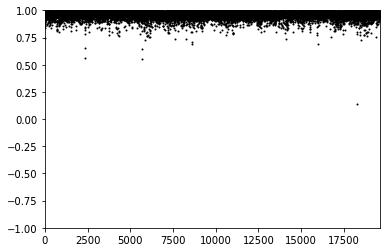

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.40 11.11111111111111


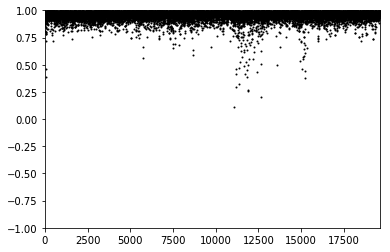

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.60 10.600324499729584


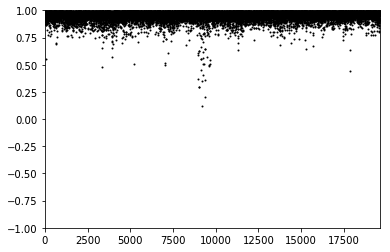

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.80 10.123966942148758


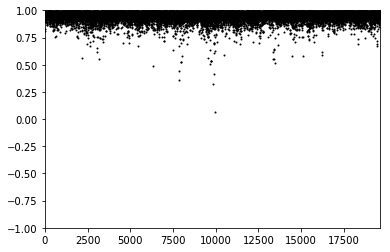

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.02 9.636137482116608


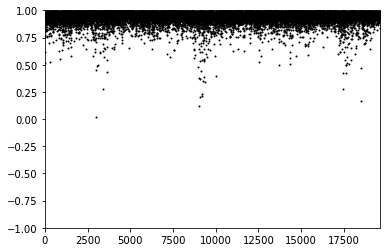

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.26 9.143113043397134


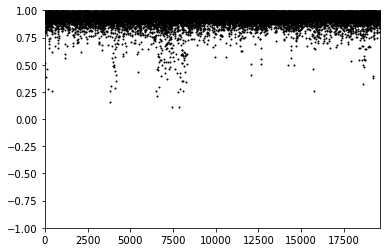

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.52 8.650519031141869


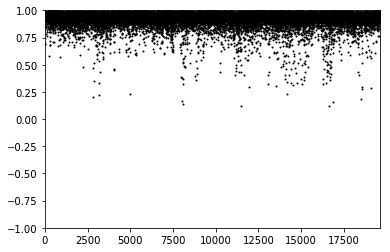

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.80 8.163265306122447


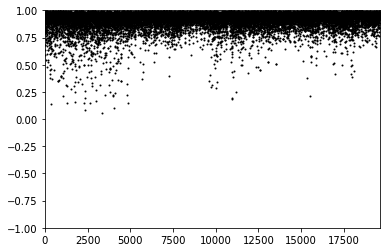

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.11 7.670324746287378


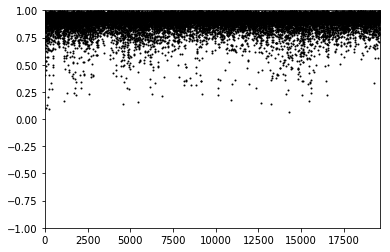

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.45 7.179322817701061


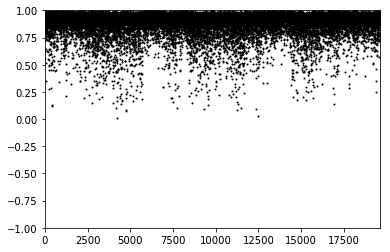

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.82 6.696710753345792


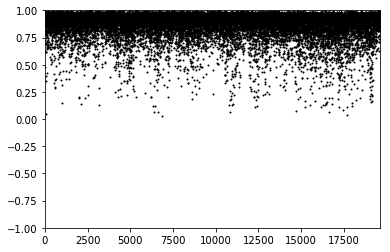

/home/walterms/mcmd/nn/data/unlbl/edge_3_11.24 6.205595167234457


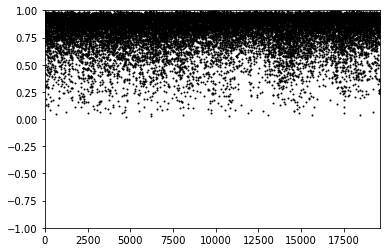

/home/walterms/mcmd/nn/data/unlbl/edge_3_11.71 5.71744864688264


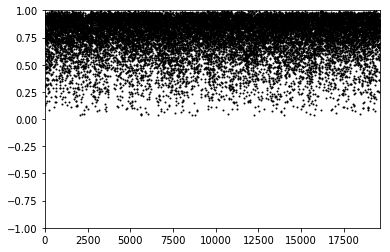

/home/walterms/mcmd/nn/data/unlbl/edge_3_12.25 5.224489795918367


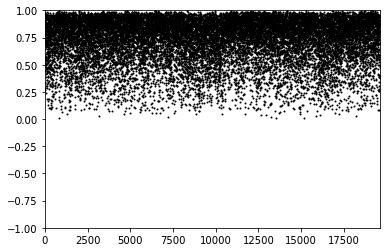

/home/walterms/mcmd/nn/data/unlbl/edge_3_12.87 4.7332448264849205


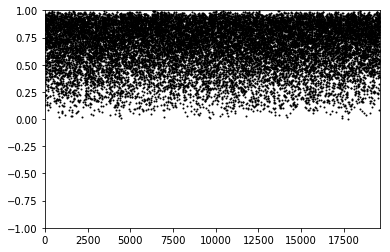

/home/walterms/mcmd/nn/data/unlbl/edge_3_13.59 4.244994669391261


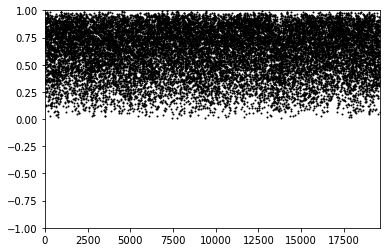

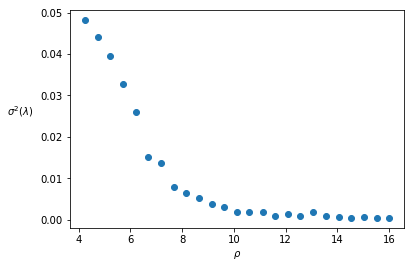

Done


In [133]:
# This block is different
# It's for handling the FNN unlabeled dataset
NBL = 4500
rodskip = 1 # for efficiency. 1 means do all
nrod = 24**2
n_nbr = 10
m = 5
nmin = 5
nblskip = 2
nlambda = NBL

lambdas_bulk = np.empty((nfiles,nlambda))
lambdas_glob = np.empty((nfiles,nlambda))
for ifile,f in enumerate(fnames):
    fin = open(f,'r')
    params = {}
    params.update({"ReducedRho": edges[ifile,1]})
    params.update({"boxEdge": edges[ifile,0]})
    print f,params["ReducedRho"]
    edge = params["boxEdge"]
    nbl = 0
    lambdacount = 0
    rods = np.zeros((nrod,3))
    cells = np.zeros((nrod,1))
    irod = 0
    
    for line in fin.readlines():
        if nbl < nblskip:
            if line == "\n": nbl+=1
            continue
        if line == "\n":
            # Done a block
#             L = Lambda(rods,n_nbr=n_nbr,edge=edge,use_bulk=True,rodskip=5)
#             L = Lambda2(rods,m,edge,nmin,ignore_walls=ignore_walls)
#             L = L[np.where(L>0.)] # remove zeroed entries that had no rods
#             if len(L) + lambdacount >= nlambda:
#                 L = L[:nlambda-lambdacount]
#             lambdas[ifile,lambdacount:(lambdacount+len(L))] = L
#             lambdacount += len(L)

            lambdas_bulk[ifile,lambdacount] = Lambda_bulk_global(rods,edge)
            lambdas_glob[ifile,lambdacount] = Lambda_bulk_global(rods,2.*edge)
            lambdacount += 1

            if lambdacount >= nlambda:
                break
            nbl+=1
            rods = np.zeros((nrod,3))
            cells = np.zeros((nrod,1))
            irod = 0
            continue

        rod = [float(s) for s in line.split()]
        rod[0] *= edge
        rod[1] *= edge
        rod[2] *= twopi
        rods[irod] = rod
        irod+=1
    fin.close()
#   print np.mean(lambdas[ifile])
#     _=plt.plot(lambdas[ifile],'k.',markersize=2)
#     _=plt.axis([0,nlambda,-1,1])
#     plt.show()

var_bulk = np.var(lambdas_bulk,axis=1)
var_glob = np.var(lambdas_glob,axis=1)
# _ = plt.plot(edges[:,1],lvar,'o')
# _ = plt.xlabel(r'$\rho$')
# _ = plt.ylabel(r'$\sigma^2(\lambda)$',rotation="horizontal",labelpad=20)
# plt.show()
f,ax = plt.subplots(1,1)
ln1 = ax.plot(edges[:,1],var_bulk,"ko",label="bulk")
ax.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)
twin = ax.twinx()
ln2 = twin.plot(edges[:,1],var_glob,"k+",label="global")
twin.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)

# added these three lines
axs = ln1+ln2
labs = [l.get_label() for l in axs]
ax.legend(axs, labs, loc="upper right")

# Save lvars
spath = "/home/walterms/mcmd/nn/data/"
fout = open(spath+"bulk-global-compare-edge3.dat",'w')
for i in range(len(var_bulk)):
    # line format: edge, rho, varbulk, varglob
    fout.write("%g %g %g %g\n"%(edges[i,0],edges[i,1],var_bulk[i],var_global[i]))
fout.close()


print "Done"

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.00 16.0


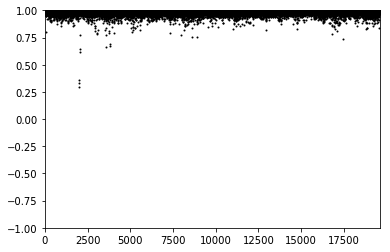

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.11 15.50875235647975


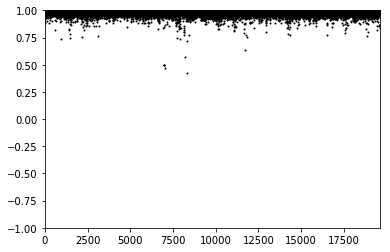

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.22 15.039786373646612


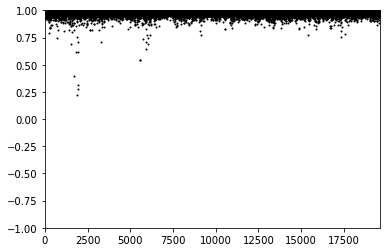

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.35 14.5124716553288


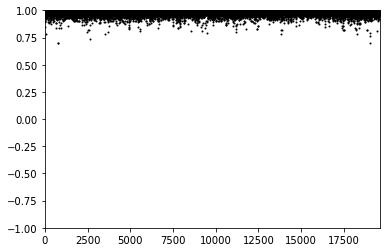

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.47 14.049952599330835


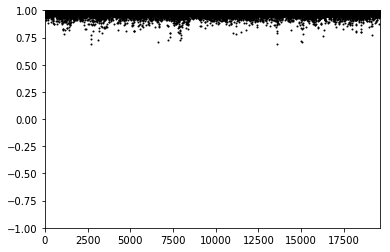

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.61 13.537758085097932


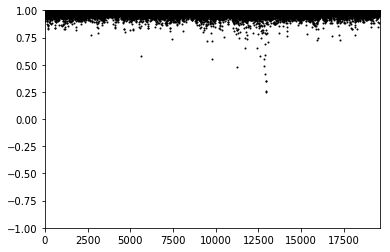

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.75 13.053069719042664


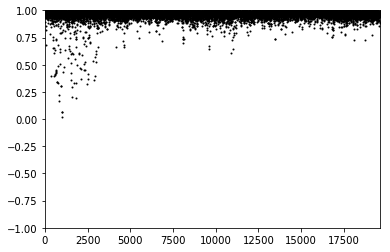

/home/walterms/mcmd/nn/data/unlbl/edge_3_7.90 12.562089408748598


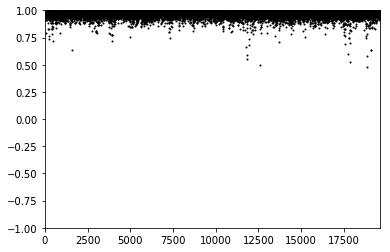

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.05 12.09829867674858


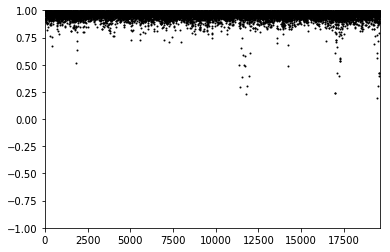

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.22 11.603057050337139


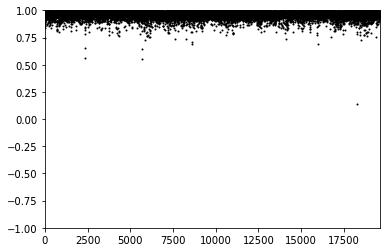

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.40 11.11111111111111


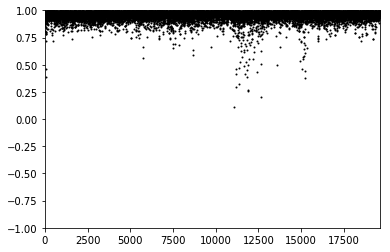

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.60 10.600324499729584


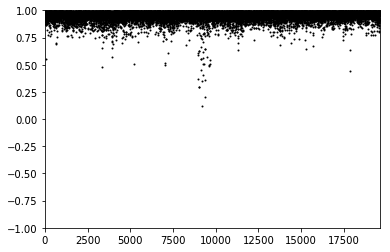

/home/walterms/mcmd/nn/data/unlbl/edge_3_8.80 10.123966942148758


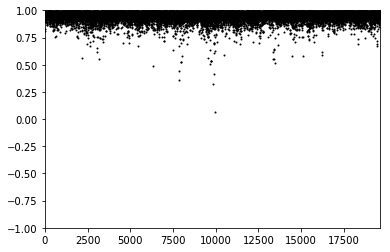

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.02 9.636137482116608


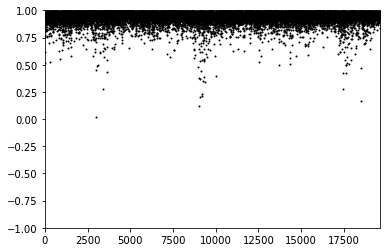

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.26 9.143113043397134


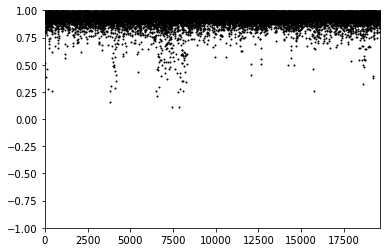

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.52 8.650519031141869


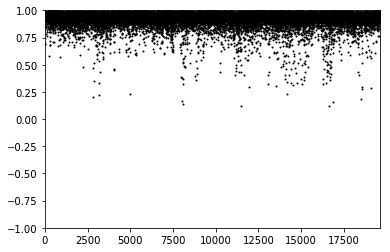

/home/walterms/mcmd/nn/data/unlbl/edge_3_9.80 8.163265306122447


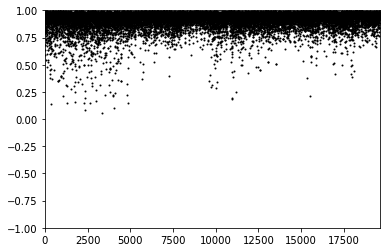

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.11 7.670324746287378


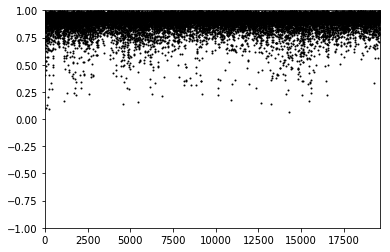

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.45 7.179322817701061


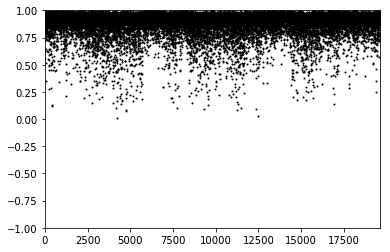

/home/walterms/mcmd/nn/data/unlbl/edge_3_10.82 6.696710753345792


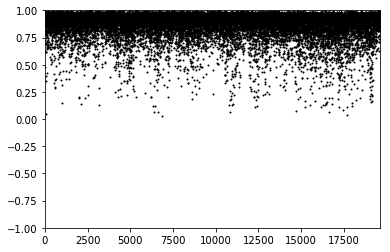

/home/walterms/mcmd/nn/data/unlbl/edge_3_11.24 6.205595167234457


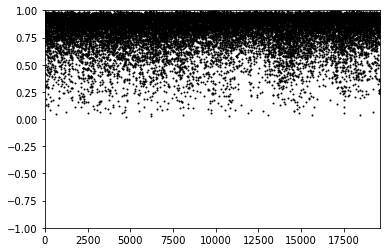

/home/walterms/mcmd/nn/data/unlbl/edge_3_11.71 5.71744864688264


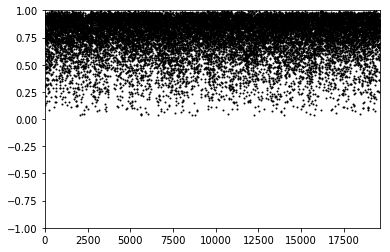

/home/walterms/mcmd/nn/data/unlbl/edge_3_12.25 5.224489795918367


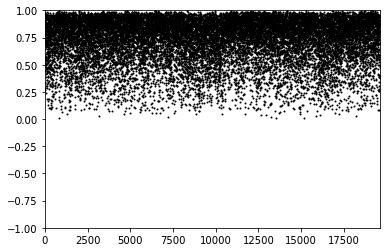

/home/walterms/mcmd/nn/data/unlbl/edge_3_12.87 4.7332448264849205


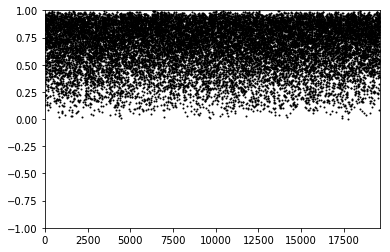

/home/walterms/mcmd/nn/data/unlbl/edge_3_13.59 4.244994669391261


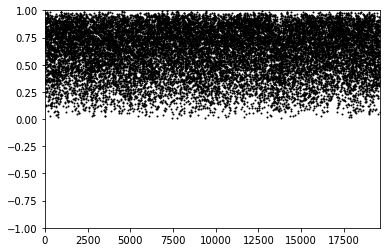

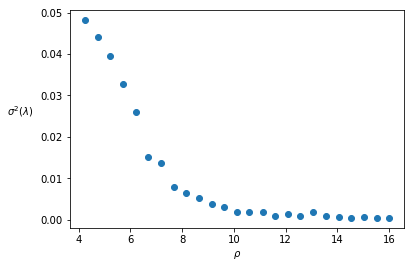

Done


In [133]:
# This block is different
# It's for handling the FNN unlabeled dataset
NBL = 4500
rodskip = 1 # for efficiency. 1 means do all
nrod = 28**2
n_nbr = 10
m = 5
nmin = 5
nblskip = 2
nlambda = NBL

lambdas_bulk = np.empty((nfiles,nlambda))
lambdas_glob = np.empty((nfiles,nlambda))
for ifile,f in enumerate(fnames):
    fin = open(f,'r')
    params = {}
    params.update({"ReducedRho": edges[ifile,1]})
    params.update({"boxEdge": edges[ifile,0]})
    print f,params["ReducedRho"]
    edge = params["boxEdge"]
    nbl = 0
    lambdacount = 0
    rods = np.zeros((nrod,3))
    cells = np.zeros((nrod,1))
    irod = 0
    
    for line in fin.readlines():
        if nbl < nblskip:
            if line == "\n": nbl+=1
            continue
        if line == "\n":
            # Done a block
#             L = Lambda(rods,n_nbr=n_nbr,edge=edge,use_bulk=True,rodskip=5)
#             L = Lambda2(rods,m,edge,nmin,ignore_walls=ignore_walls)
#             L = L[np.where(L>0.)] # remove zeroed entries that had no rods
#             if len(L) + lambdacount >= nlambda:
#                 L = L[:nlambda-lambdacount]
#             lambdas[ifile,lambdacount:(lambdacount+len(L))] = L
#             lambdacount += len(L)

            lambdas_bulk[ifile,lambdacount] = Lambda_bulk_global(rods,edge)
            lambdas_glob[ifile,lambdacount] = Lambda_bulk_global(rods,2.*edge)
            lambdacount += 1

            if lambdacount >= nlambda:
                break
            nbl+=1
            rods = np.zeros((nrod,3))
            cells = np.zeros((nrod,1))
            irod = 0
            continue

        rod = [float(s) for s in line.split()]
        rod[0] *= edge
        rod[1] *= edge
        rod[2] *= twopi
        rods[irod] = rod
        irod+=1
    fin.close()
#   print np.mean(lambdas[ifile])
#     _=plt.plot(lambdas[ifile],'k.',markersize=2)
#     _=plt.axis([0,nlambda,-1,1])
#     plt.show()

var_bulk = np.var(lambdas_bulk,axis=1)
var_glob = np.var(lambdas_glob,axis=1)
# _ = plt.plot(edges[:,1],lvar,'o')
# _ = plt.xlabel(r'$\rho$')
# _ = plt.ylabel(r'$\sigma^2(\lambda)$',rotation="horizontal",labelpad=20)
# plt.show()
f,ax = plt.subplots(1,1)
ln1 = ax.plot(edges[:,1],var_bulk,"ko",label="bulk")
ax.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)
twin = ax.twinx()
ln2 = twin.plot(edges[:,1],var_glob,"k+",label="global")
twin.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)

# added these three lines
axs = ln1+ln2
labs = [l.get_label() for l in axs]
ax.legend(axs, labs, loc="upper right")

# Save lvars
spath = "/home/walterms/mcmd/nn/data/"
fout = open(spath+"bulk-global-compare-edge3.dat",'w')
for i in range(len(var_bulk)):
    # line format: edge, rho, varbulk, varglob
    fout.write("%g %g %g %g\n"%(edges[i,0],edges[i,1],var_bulk[i],var_global[i]))
fout.close()


print "Done"

In [94]:
lambdas_bulk = lambdas
var_bulk = lvar

In [92]:
lambdas_global = lambdas
var_global = lvar

Text(0,0.5,u'$\\sigma^2(\\Lambda)$')

Text(0,0.5,u'$\\sigma^2(\\Lambda)$')

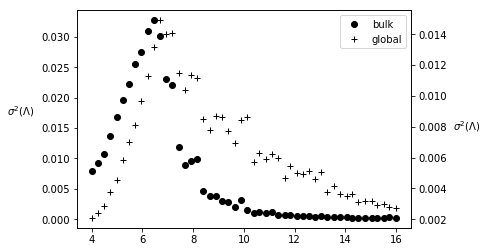

In [114]:
f,ax = plt.subplots(1,1)
ln1 = ax.plot(edges[:,1],var_bulk,"ko",label="bulk")
ax.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)
twin = ax.twinx()
ln2 = twin.plot(edges[:,1],var_global,"k+",label="global")
twin.set_ylabel(r'$\sigma^2(\Lambda)$',rotation="horizontal",labelpad=20)

# added these three lines
axs = ln1+ln2
labs = [l.get_label() for l in axs]
ax.legend(axs, labs, loc="upper right")


In [96]:
# Save lvars
spath = "/home/walterms/mcmd/nn/data/"
fout = open(spath+"bulk-global-compare.dat",'w')
for i in range(len(var_bulk)):
    # line format: edge, rho, varbulk, varglob
    fout.write("%g %g %g %g\n"%(edges[i,0],edges[i,1],var_bulk[i],var_global[i]))
fout.close()

In [115]:
f.savefig("/home/walterms/mcmd/imgs/paperimgs/bulk_glob_compare.png",bbox_inches="tight",pad_inches=1)

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.00 16.0


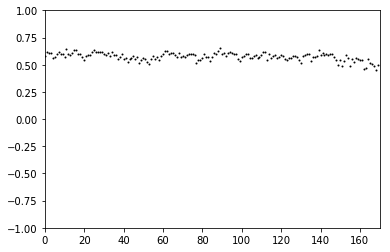

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.11 15.5088


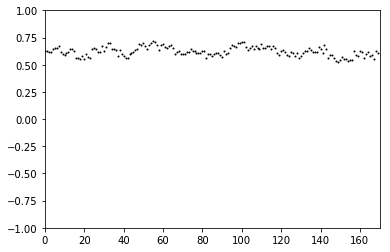

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.22 15.0398


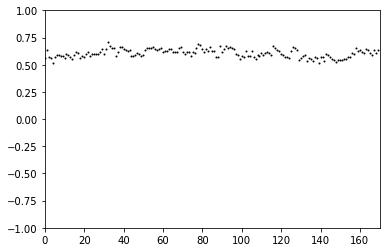

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.35 14.5125


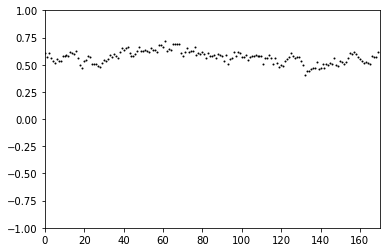

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.47 14.05


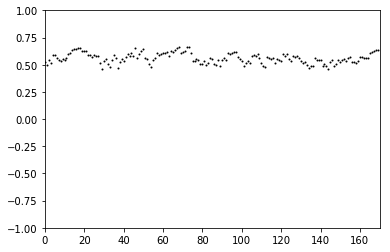

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.61 13.5378


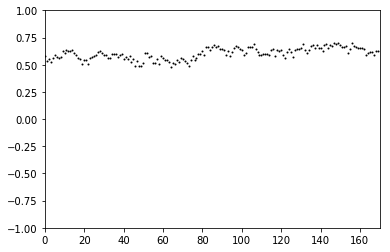

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.75 13.0531


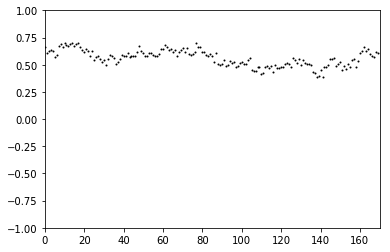

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_7.90 12.5621


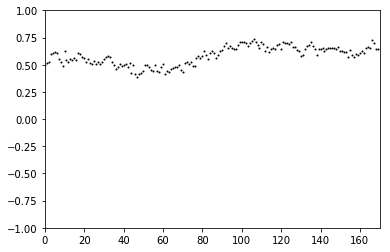

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_8.05 12.0983


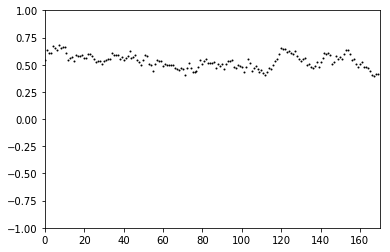

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_8.22 11.6031


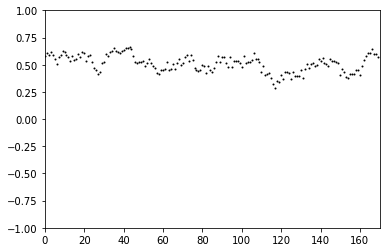

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_8.40 11.1111


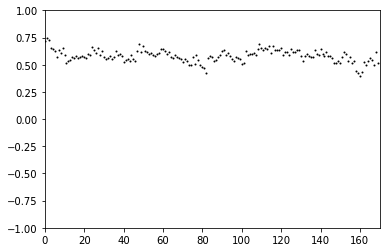

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_8.60 10.6003


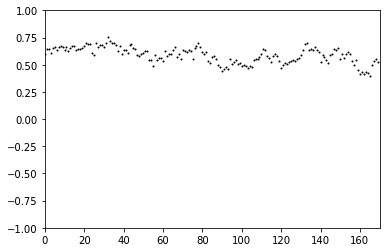

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_8.80 10.124


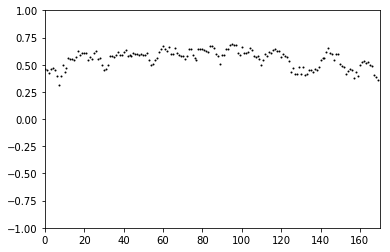

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_9.02 9.63614


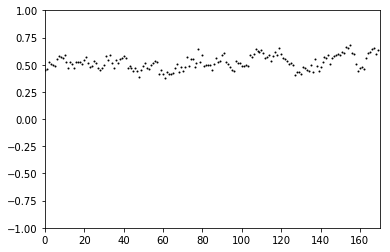

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_9.26 9.14311


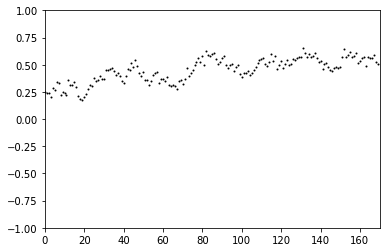

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_9.52 8.65052


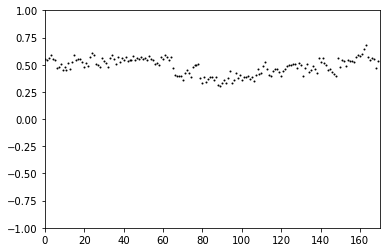

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_9.80 8.16327


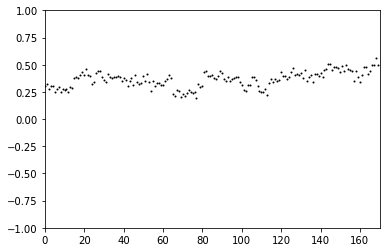

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_10.11 7.67032


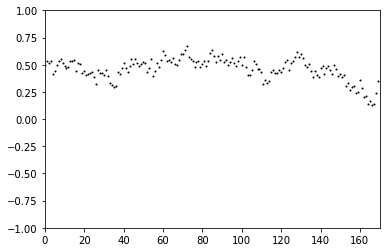

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_10.45 7.17932


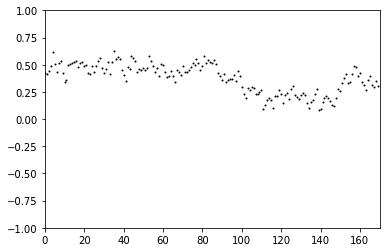

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_10.82 6.69671


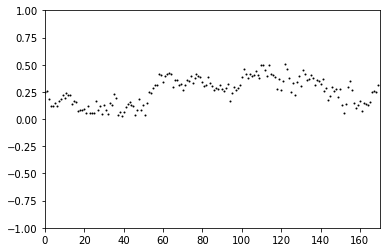

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_11.24 6.2056


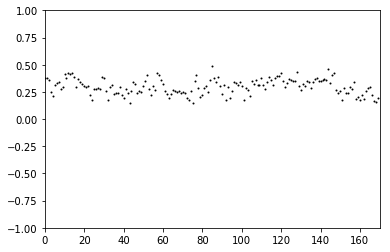

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_11.71 5.71745


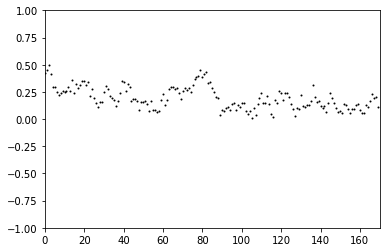

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_12.25 5.22449


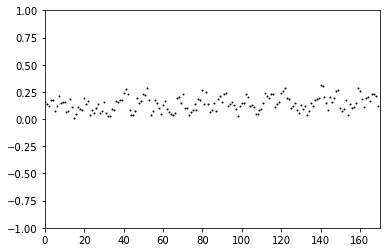

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_12.87 4.73324


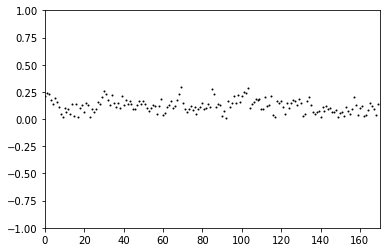

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_13.59 4.24499


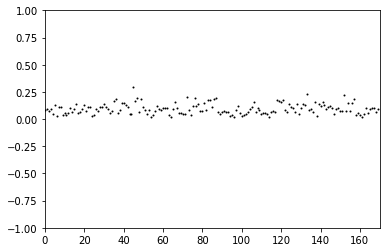

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_14.50 3.72889


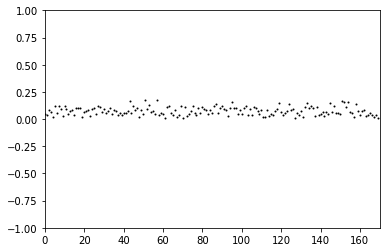

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_15.50 3.26327


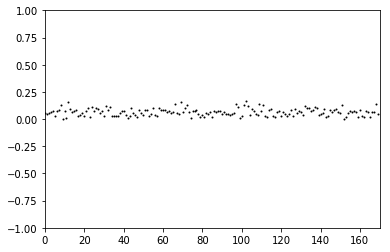

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_16.50 2.87971


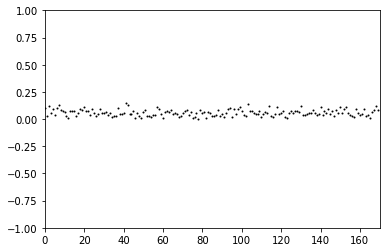

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_18.00 2.41975


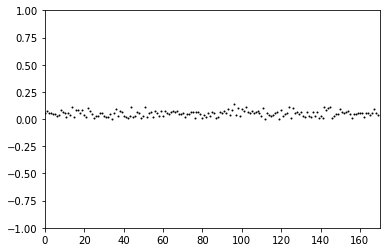

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_20.00 1.96


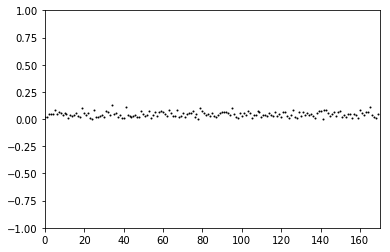

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_22.00 1.61983


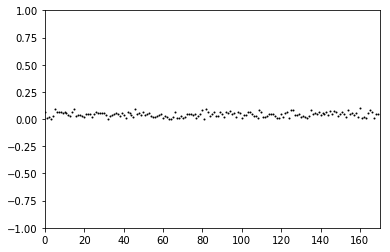

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_24.00 1.36111


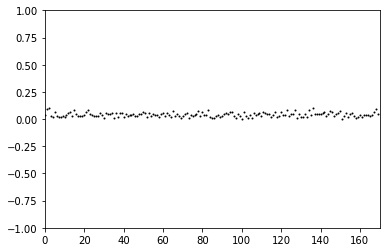

/home/walterms/mcmd/output/paperruns/edge_3/edge_3_26.00 1.15976


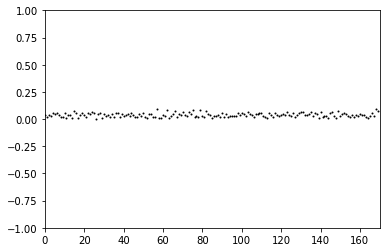

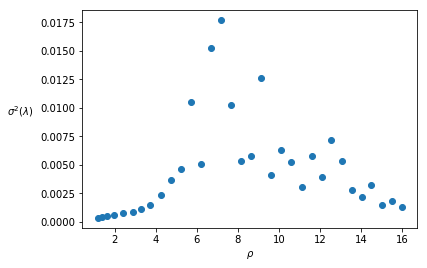

Done


In [23]:
NBL = 170
nrod = 28**2
m = 5
nmin = 5
ignore_walls=False
nblskip = 2
# nlambda = 784*NBL // 2
# nlambda = NBL*m*m
nlambda = NBL

rc = np.inf
n_nbr = 10

lambdas = np.empty((nfiles,nlambda))
lambdameans = np.empty((nfiles,NBL))
for ifile,f in enumerate(fnames):
    fin = open(f,'r')
#     header = fin.readline().split("|")
    params = {}
#     for l in header:
#         spt = l.split()
#         try:
#             params.update({spt[0]: float(spt[1])})
#         except:
#             continue

    params.update({"ReducedRho": edges[ifile,1]})
    params.update({"boxEdge": edges[ifile,0]})
    
    print f,params["ReducedRho"]
    edge = params["boxEdge"]
    nbl = 0
    lambdacount = 0
#     nrod = int(params["nObj"])
    rods = np.zeros((nrod,3))
    cells = np.zeros((nrod,1))
    irod = 0
    
    for line in fin.readlines():
        if nbl < nblskip:
            if line == "\n": nbl+=1
            continue
        if line == "\n":
            # Done a block
#             L, _, n_nbr_count, __ = Lambda(rods,n_nbr=n_nbr,use_bulk=True)
#             L = Lambda2(rods,m,edge,nmin,ignore_walls=ignore_walls)
#             L = L[np.where(L>0.)] # remove zeroed entries that had no rods
#             if len(L) + lambdacount >= nlambda:
#                 L = L[:nlambda-lambdacount]

            L = [Lambda_bulk_global(rods,edge*2)]
            lambdas[ifile,lambdacount:(lambdacount+len(L))] = L


            lambdacount += len(L)
            if lambdacount >= nlambda:
#                     print np.mean(n_nbr_count)
                break
#             print np.mean(L)
#             lambdameans[ifile,nbl-nblskip] = np.mean(L)
            nbl+=1
            rods = np.zeros((nrod,3))
            cells = np.zeros((nrod,1))
            irod = 0
            continue

        rod = [float(s) for s in line.split()]
        rod[4] = myrotate(rod[4])
#         rod[4] = myrotate(np.random.rand(1)*twopi) # Let's give it a random orientation
        rods[irod] = rod[2:5]
        cells[irod] = int(rod[1])
        irod+=1
    fin.close()
#   print np.mean(lambdas[ifile])
    _=plt.plot(lambdas[ifile],'k.',markersize=2)
    _=plt.axis([0,nlambda,-1,1])
    plt.show()

lvar = np.var(lambdas,axis=1)
_ = plt.plot(edges[:,1],lvar,'o')
_ = plt.xlabel(r'$\rho$')
_ = plt.ylabel(r'$\sigma^2(\lambda)$',rotation="horizontal",labelpad=20)
plt.show()


print "Done"

In [ ]:
f.savefig("/home/walterms/mcmd/imgs/paperimgs/bulk-global-compare.eps")

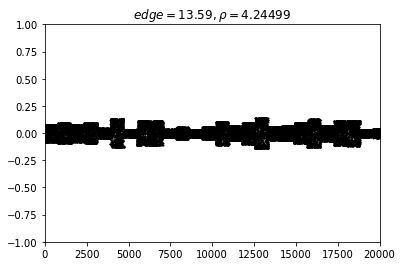

In [14]:
from matplotlib import animation, rc
from IPython.display import HTML

f = plt.figure()
ax = f.add_subplot(111,xlim=(0,nlambda),ylim=(-1,1))
stuff, = ax.plot([],[],'k.',markersize=2)


def initlambda():
    stuff.set_data([],[])
    return stuff,

def animatelambda(i):
    x = np.arange(nlambda)
    dat = lambdas[i,:]
    stuff.set_data(x,dat)
    ax.set_title(r'$edge = {}, \rho = {}$'.format(edges[i,0],edges[i,1]))
    return stuff,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(f, animatelambda, init_func=initlambda,
                               frames=nfiles, interval=200, blit=True, repeat_delay=1000)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('lambda_anim.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

# plt.show()
HTML(anim.to_html5_video())

In [53]:
lvar = np.var(lambdas,axis=1)
lavg = np.mean(lambdas,axis=1)

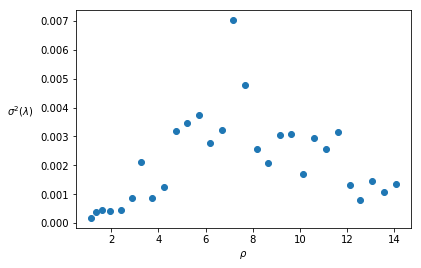

In [58]:
# _ = plt.plot(lvar,'o')
_ = plt.plot(edges[4:,1],lvar[4:],'o')
_ = plt.xlabel(r'$\rho$')
_ = plt.ylabel(r'$\sigma^2(\lambda)$',rotation="horizontal",labelpad=20)
# plt.plot(edges[:,0],lvar)
# plt.ylim(0,1)